In [124]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import seaborn as sns
import torch as th
import matplotlib.pyplot as plt
from aimanager.utils.utils import make_dir
from aimanager.utils.merge import merge_files_by_name

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})


run = 'dev'

base_folder = f'../../data/manager/simulate_rule/v2/{run}'

filename = os.path.join(base_folder, 'data', 'metrics.parquet')

plot_folder = f'plots/{run}'

make_dir(plot_folder)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [125]:
def _plot_heatmap(data, x, y, values, normalise=True):
    dfg = data.groupby([x,y])[values].sum()
    dfg = dfg.reset_index()
    if normalise:
        dfg[values] = dfg[values] / dfg.groupby([x])[values].transform('sum')
    cm = dfg.pivot_table(index=x, columns=y, values=values)
    cm = cm.sort_index(ascending=False)
    sns.heatmap(cm)

In [126]:
file_names = ['trace.csv']


df = pd.read_parquet(filename)


In [127]:
df.columns

Index(['round_number', 's', 'c', 'b', 'artificial_humans', 'metric', 'value'], dtype='object')

In [128]:
df.metric.unique()

array(['contributions', 'contributor_payoff', 'next_reward',
       'common_good', 'manager_payoff', 'punishments'], dtype=object)

In [129]:
id_vars = list(set(df.columns) - set(('value',)))


df = df.sort_values(['round_number'])

df['cumsum'] = df.groupby(id_vars)['value'].cumsum()
df['cumcount'] = df.groupby(id_vars)['value'].cumcount() + 1
df['cummean'] = df['cumsum'] / df['cumcount']

In [130]:
metrics = ['common_good', 'contributor_payoff', 'punishments', 'manager_payoff', 'next_reward', 'contributions']
metrics = ['common_good', 'punishments', 'next_reward', 'contributions']

focus = 's'

dfs = df.copy()

w = df['metric'].isin(metrics)

df = df[w]

# sns.relplot(data=df, x=focus, y='value', col='metric', hue='artificial_humans', row='round_number', ci=None, facet_kws={'sharey': False, 'sharex': True}, kind='line')

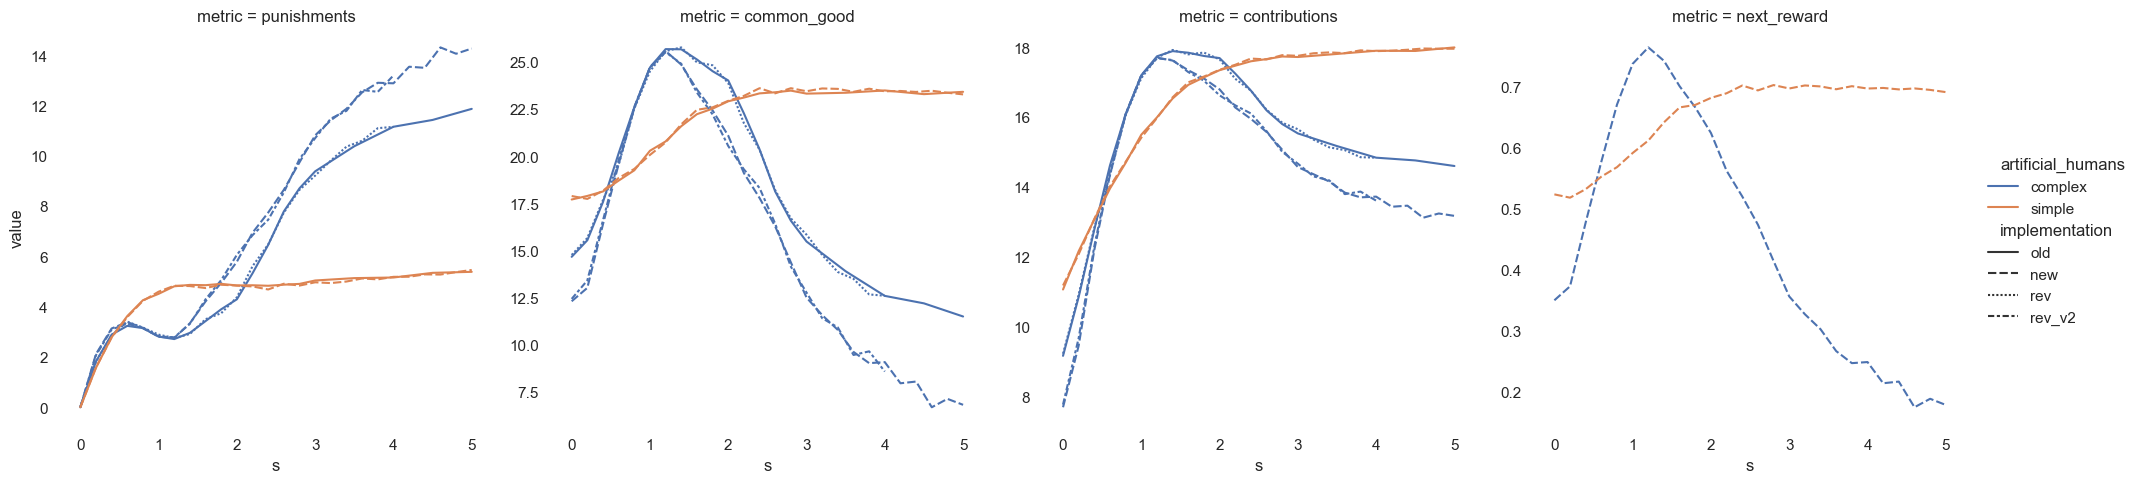

In [131]:

df_old = pd.read_parquet('v_1_2_1.parquet')

df_rev = pd.read_csv('../../data/manager/simulate_rule/v1_comp/data/trace.csv')
df_rev_v2 = pd.read_csv('../../data/manager/simulate_rule/v1_comp_fixed/data/trace.csv')



id_vars = ['s', 'agent','round_number']

value_vars=['punishments', 'common_good', 'contributions', 'payoffs']

df_rev = pd.melt(df_rev, id_vars=id_vars, value_vars=value_vars, var_name='metric', value_name='value')
df_rev_v2 = pd.melt(df_rev_v2, id_vars=id_vars, value_vars=value_vars, var_name='metric', value_name='value')


df_new = df.copy()
df_new['implementation'] = 'new'
df_old['implementation'] = 'old'
df_rev['implementation'] = 'rev'
df_rev['artificial_humans'] = 'complex'
df_rev_v2['implementation'] = 'rev_v2'
df_rev_v2['artificial_humans'] = 'complex'


df_mixed = pd.concat([df_old, df_new, df_rev, df_rev_v2])

dfs = df_mixed.copy()

metrics = ['common_good', 'punishments', 'next_reward', 'contributions']

focus = 's'

w = dfs['metric'].isin(metrics)

dfs = dfs[w]

# implementations = ['rev']
# w = dfs['implementation'].isin(implementations)
# dfs = dfs[w]

dfs = dfs.reset_index()

sns.relplot(
    data=dfs, x=focus, y='value', col='metric', hue='artificial_humans', 
    style='implementation', ci=None, facet_kws={'sharey': False, 'sharex': True}, 
    kind='line')


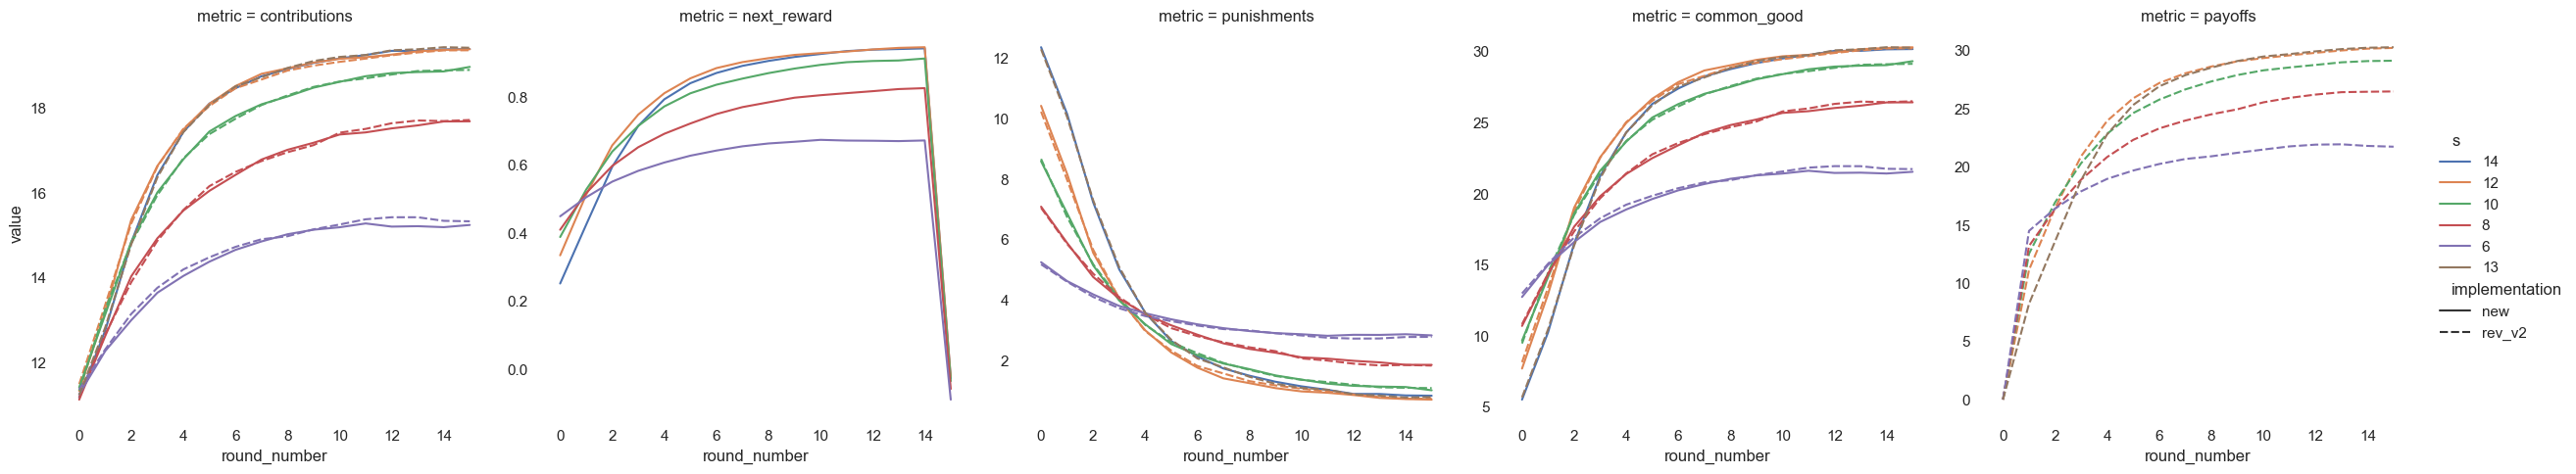

In [132]:
dfs = df_mixed.copy()

metrics = ['common_good', 'punishments', 'next_reward', 'contributions']

focus = 's'

# w = dfs['metric'].isin(metrics)

# dfs = dfs[w]


# w = dfs['metric'].isin(metrics)

# dfs = dfs[w]

implementations = ['rev_v2', 'new']
w = dfs['implementation'].isin(implementations)
dfs = dfs[w]

w = ((dfs['s'] > 0.5) & (dfs['s'] < 1.5))
dfs = dfs[w]

w = (dfs['artificial_humans'] == 'complex')
dfs = dfs[w]

dfs = dfs.reset_index()

dfs['s'] = (dfs['s'] * 10).astype(int).astype(str)

sns.relplot(
    data=dfs, x='round_number', y='value', col='metric', hue='s', 
    style='implementation', ci=None, facet_kws={'sharey': False, 'sharex': True}, 
    kind='line')

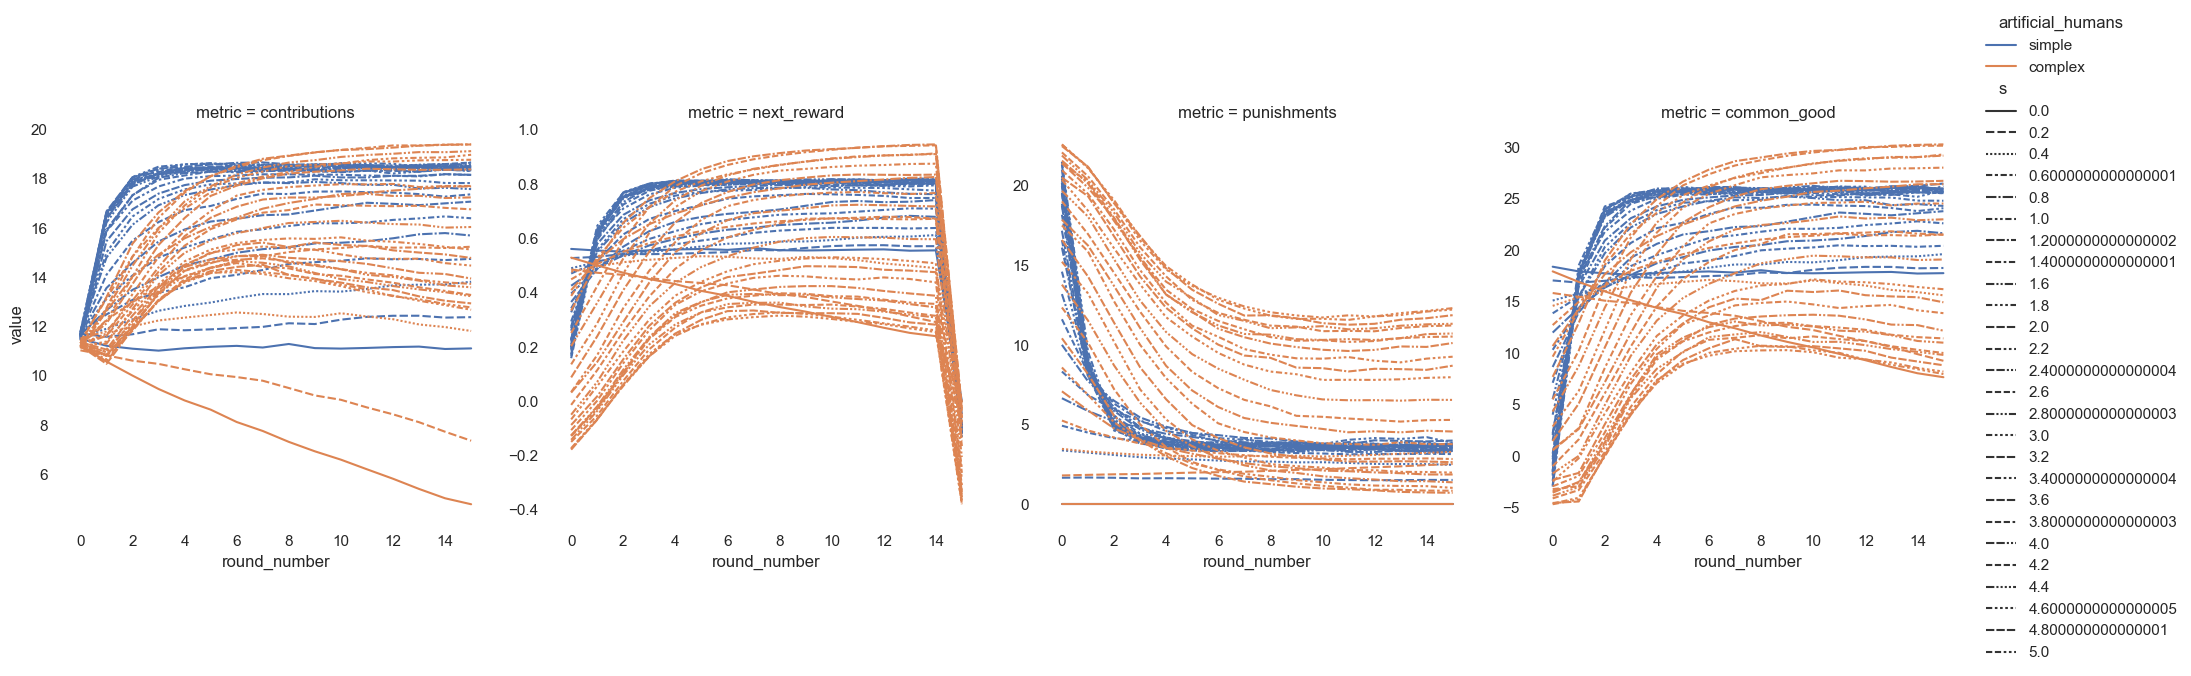

In [133]:
metrics = ['common_good', 'contributor_payoff', 'punishments', 'manager_payoff', 'next_reward', 'contributions']

focus = 's'

dfs = df.copy()

w = df['metric'].isin(metrics)

df = df[w]

sns.relplot(
    data=df, x='round_number', y='value', col='metric', hue='artificial_humans', 
    style='s', ci=None, facet_kws={'sharey': False, 'sharex': True}, 
    kind='line')

In [134]:
focus = 'c'

df = df_melt.copy()

selection = {k: v for k, v in ref.items() if k != focus}

w = pd.concat(
    (df[k] == v
    for k,v in selection.items()), axis=1
).all(1)

w2 = df['metric'].isin(value_vars)

df = df[w & w2]

sns.relplot(data=df, x=focus, y='value', col='metric', hue='artificial_humans', ci=None, facet_kws={'sharey': False, 'sharex': True}, kind='line')

NameError: name 'df_melt' is not defined

In [ ]:
focus = 'b'

df = df_melt.copy()

selection = {k: v for k, v in ref.items() if k != focus}

w = pd.concat(
    (df[k] == v
    for k,v in selection.items()), axis=1
).all(1)

w2 = df['metric'].isin(value_vars)

df = df[w & w2]

sns.relplot(data=df, x=focus, y='value', col='metric', hue='artificial_humans', ci=None, facet_kws={'sharey': False, 'sharex': True}, kind='line')

In [ ]:
# df = df_melt.groupby(['s', 'metric', 'round_number'])['value'].mean().reset_index()
df = df_melt.copy()

w = (
    (df['c'] == 0) &
    (df['b'] == 0) &
    # df['round_number'].isin([0,1,2,3,7,11,15]) &
    (df['metric'].isin(['common_good', 'cum_common_good']))
)
df = df[w]


sns.relplot(data=df, x='s', y='value', row='metric', col='artificial_humans', hue='round_number', kind='line', facet_kws={'sharey': False, 'sharex': True}, ci=None)

In [ ]:
df = df_melt.copy()

w = (
    (df['c'] == 0) &
    # (df['b'] == 0) &
    df['round_number'].isin([15]) &
    (df['metric'].isin(['cum_common_good']))
)
df = df[w]

fg = sns.relplot(
    data=df, x='s', y='value', row='metric', col='artificial_humans', hue='b', kind='line', facet_kws={'sharey': False, 'sharex': True}, ci=None)


fg.savefig(os.path.join(plot_folder, 'common_good_s_b.jpg'))


In [ ]:
df = df_melt.copy()

w = (
    # (df['c'] == 0) &
    (df['b'] == 0) &
    df['round_number'].isin([15]) &
    (df['metric'].isin(['cum_common_good']))
)
df = df[w]

fg = sns.relplot(
    data=df, x='s', y='value', row='metric', col='artificial_humans', hue='c', kind='line', facet_kws={'sharey': False, 'sharex': True}, ci=None)


fg.savefig(os.path.join(plot_folder, 'common_good_s_c.jpg'))

In [ ]:
df = df_melt.copy()

w = (
    (df['c'] == 0) &
    (df['b'] == 0)  &
    # df['round_number'].isin([0,1,2,3,7,11,15]) &
    (df['metric'].isin(['contributions', 'punishments']))
)
df = df[w]


fg = sns.relplot(data=df, x='round_number', y='value', row='metric', col='artificial_humans', hue='s', kind='line', facet_kws={'sharey': False, 'sharex': True}, ci=None)


fg.savefig(os.path.join(plot_folder, 'over_rounds.jpg'))


In [ ]:
df = df_melt.copy()

w = (
    (df['c'] == 0) &
    (df['b'] == 0)  &
    # df['round_number'].isin([0,1,2,3,7,11,15]) &
    (df['metric'].isin(['common_good', 'cum_common_good']))
)
df = df[w]


fg = sns.relplot(data=df, x='round_number', y='value', row='metric', col='artificial_humans', hue='s', kind='line', facet_kws={'sharey': False, 'sharex': True}, ci=None)


fg.savefig(os.path.join(plot_folder, 'over_rounds_cg.jpg'))

In [ ]:
df = df_melt.copy()

w = (
    (df['c'] == 0) &
    (df['b'] == 0)  &
    # df['round_number'].isin([0,1,2,3,7,11,15]) &
    (df['metric'].isin(['payoffs', 'cum_payoffs']))
)
df = df[w]


fg = sns.relplot(data=df, x='round_number', y='value', row='metric', col='artificial_humans', hue='s', kind='line', facet_kws={'sharey': False, 'sharex': True}, ci=None)


fg.savefig(os.path.join(plot_folder, 'over_rounds_rew.jpg'))

In [ ]:
df = df_melt.copy()

w = (
    (df['c'] == 0) &
    df['round_number'].isin([0,1,2,3,7,11,15]) &
    (df['metric'] == 'common_good')
)
df = df[w]


plot_heatmap = lambda data, color: _plot_heatmap(
    data, x='s',y='b', values='value', normalise=False)

fg = sns.FacetGrid(
    df, row='round_number',
    col='artificial_humans',
    height=5)
fg.map_dataframe(plot_heatmap)

In [ ]:
df = df_melt.copy()

w = (
    (df['c'] == 0) &
    df['round_number'].isin([0,1,2,3,7,11,15]) &
    (df['metric'] == 'cum_common_good')
)
df = df[w]


plot_heatmap = lambda data, color: _plot_heatmap(
    data, x='s',y='b', values='value', normalise=False)

fg = sns.FacetGrid(
    df, row='round_number',
    col='artificial_humans',
    height=5)
fg.map_dataframe(plot_heatmap)